In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




In [3]:
def create_data(n, a, b, c, noise):
    x = np.random.rand(n, 1)
    y = a * x**2 + b * x + c + np.random.randn(n, 1) * noise
    return x, y


def save_data(x, y, filename):
    with open(filename, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['x', 'y'])
        for i in range(len(x)):
            writer.writerow([x[i][0], y[i][0]])

def plot_data(x, y):
    plt.plot(x, y, 'b.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [4]:

def main(n=100, a=3, b=0, c=0.25, noise=0.1, plot=False, output='data.csv', model_output='model.pkl'):
    x, y = create_data(n, a, b, c, noise)
    save_data(x, y, output)
    if plot:
        plot_data(x, y)

    # Creating polynomial features
    poly_features = PolynomialFeatures(degree=2)
    x_poly = poly_features.fit_transform(x)

    # Fitting the regression model
    model = LinearRegression()
    model.fit(x_poly, y)

    # Making predictions
    x_new = np.linspace(0, 1, 100).reshape(-1, 1)
    x_new_poly = poly_features.transform(x_new)
    y_pred = model.predict(x_new_poly)

    # Plotting the regression line
    plt.plot(x, y, 'b.')
    plt.plot(x_new, y_pred, 'r-')
    plt.title('Fitted Regression Model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Pickling the model
    with open(model_output, 'wb') as f:
        pickle.dump(model, f)
        


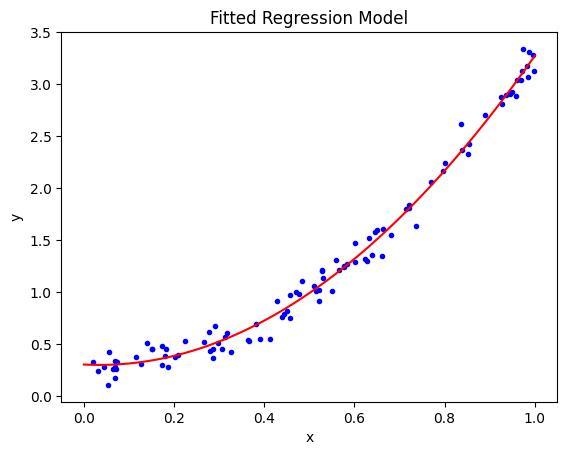

In [4]:
if __name__ == '__main__':
    main()
